# Prueba de Juzzy
Extensión: IPYNB

Considera las variables lingüísticas ESTATURAS y EDADES

In [2]:
from juzzyPython.generic.Tuple import Tuple
from juzzyPython.generic.Input import Input

# Variable linguistica: Estaturas
estaturas = Input("Estaturas", Tuple(0, 210)) # Estatura de los alumnos en cm

# Variable linguistica: Edades
edades = Input("Edades", Tuple(0, 100)) # Edad de los alumnos en años

In [3]:
from juzzyPython.type1.sets.T1MF_Triangular import T1MF_Triangular
from juzzyPython.type1.sets.T1MF_Gaussian import T1MF_Gaussian
from juzzyPython.type1.sets.T1MF_Trapezoidal import T1MF_Trapezoidal

# Conjuntos difusos para la variable Estaturas
bajos_mf = T1MF_Trapezoidal("Bajos", [0, 0, 140, 160]) # a,b,c,d
normales_mf = T1MF_Triangular("Normales", 150, 170, 190) # a,b,c
altos_mf = T1MF_Trapezoidal("Altos", [170, 190, 210, 210])

# Conjuntos difusos para la variable Edades
jovenes_mf = T1MF_Trapezoidal("Jovenes", [0, 0, 15, 20]) # a,b,c,d
adultos_jovenes_mf = T1MF_Gaussian("Adultos", 20, 5) # a,b,c
adultos_mayores_mf = T1MF_Trapezoidal("Adultos Mayores", [40, 60, 100, 100]) # a,b,c,d

# Asociar los conjuntos difusos a las variables linguisticas

In [4]:
from juzzyPython.type1.system.T1_Antecedent import T1_Antecedent
# Asociar los conjuntos difusos a las variables linguisticas
bajos = T1_Antecedent(estaturas, bajos_mf, "Estatura baja")
normales = T1_Antecedent(estaturas, normales_mf, "Estatura normal")
altos = T1_Antecedent(estaturas, altos_mf, "Estatura alta")

jovenes = T1_Antecedent(edades, jovenes_mf, "Joven")
adultos_jovenes = T1_Antecedent(edades, adultos_jovenes_mf, "Adulto joven")
adultos_mayores = T1_Antecedent(edades, adultos_mayores_mf, "Adulto mayor")

# Plots

In [5]:
from juzzyPython.generic.Plot import Plot
plot = Plot()
#plot.plotMF()

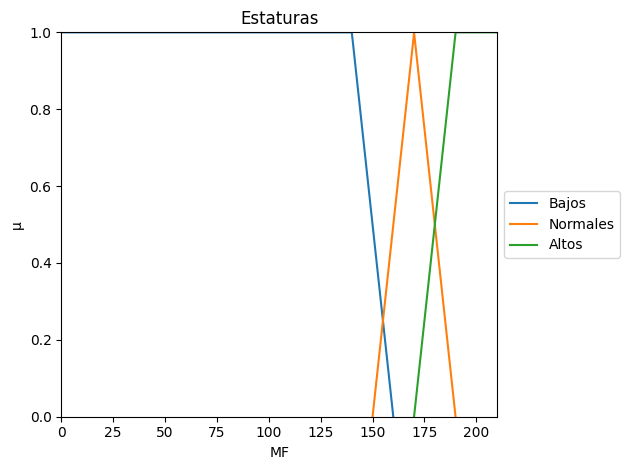

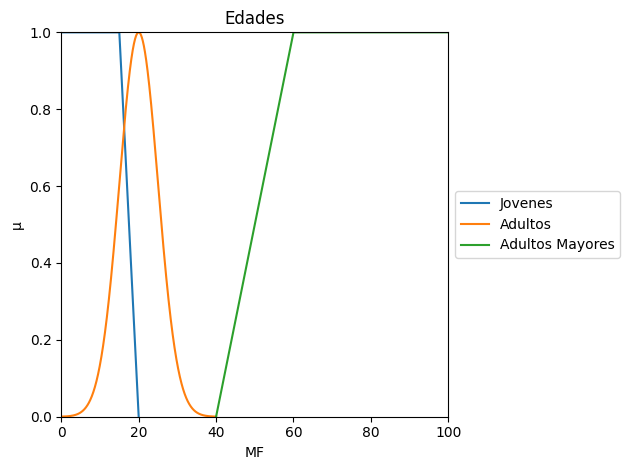

In [6]:
from juzzyPython.generic.Plot import Plot
# Graficar los conjuntos difusos de las variables: ESTATURAS y EDADES

def plotMF(name, sets, xAxisRange, discretisationLevel):
    plot.figure()
    plot.title(name)
    for set in sets:
        plot.plotMF("MF",set.getName(),
                    set,
                    discretisationLevel,
                    xAxisRange,
                    Tuple(0, 1),
                    False)
        plot.legend()

plot = Plot()
plotMF("Estaturas", [bajos_mf, normales_mf, altos_mf], estaturas.getDomain(), 1000)
plotMF("Edades", [jovenes_mf, adultos_jovenes_mf, adultos_mayores_mf], edades.getDomain(), 1000)
plot.show()

# Fuzzy Control Systems: The Tipping Problem

The *tipping problem* is commonly used to illustrate the power of fuzzy logic
principles to generate complex behavior from a compact, intuitive set of
expert rules.

## The Tipping Problem

Let's create a fuzzy control system which models how you might choose to tip
at a restaurant.  When tipping, you consider the service and food quality,
rated between 0 and 10. You use this to leave a tip of between 0 and 25%.

We would formulate this problem as:

* Antecedents (Inputs)
   - `service`
      * Universe (ie, crisp value range): How good was the service of the wait
        staff, on a scale of 0 to 10?
      * Fuzzy set (ie, fuzzy value range): poor, acceptable, amazing
   - `food quality`
      * Universe: How tasty was the food, on a scale of 0 to 10?
      * Fuzzy set: bad, decent, great
* Consequents (Outputs)
   - `tip`
      * Universe: How much should we tip, on a scale of 0% to 25%
      * Fuzzy set: low, medium, high
* Rules
   - IF the *service* was good *or* the *food quality* was good,
     THEN the tip will be high.
   - IF the *service* was average, THEN the tip will be medium.
   - IF the *service* was poor *and* the *food quality* was poor
     THEN the tip will be low.
* Usage
   - If I tell this controller that I rated:
      * the service as 9.8, and
      * the quality as 6.5,
   - it would recommend I leave:
      * a 20.2% tip.

## Creating the Tipping Controller Using the JuzzyPy API

We can use the `JuzzyPython` control system API to model this. First, let's define fuzzy variables.

In [7]:
from juzzyPython.generic.Tuple import Tuple # Importar la clase Tuple: rangos de valores
from juzzyPython.generic.Input import Input
from juzzyPython.generic.Output import Output # Importar la clase Output
from juzzyPython.type1.sets.T1MF_Triangular import T1MF_Triangular
from juzzyPython.type1.sets.T1MF_Gaussian import T1MF_Gaussian
from juzzyPython.type1.sets.T1MF_Gauangle import T1MF_Gauangle
from juzzyPython.type1.sets.T1MF_Trapezoidal import T1MF_Trapezoidal
from juzzyPython.type1.system.T1_Antecedent import T1_Antecedent
from juzzyPython.type1.system.T1_Consequent import T1_Consequent

# Inputs
food = Input("Food", Tuple(0, 10)) # Comida de 0 a 10
service = Input("Service", Tuple(0, 10)) # Servicio de 0 a 10
# Outputs
tip = Output("Tip", Tuple(0, 30)) # Porcentaje de propina de 0 a 30

## Funciones de pertenencia

In [8]:
badFood_mf = T1MF_Triangular("Bad Food", 0, 0, 10) # a,b,c
goodFood_mf = T1MF_Triangular("Good Food", 0, 10, 10) # a,b,c

unfriendlyService_mf = T1MF_Gaussian("Unfriendly Service", 0, 2) # mu, spread
okService_mf = T1MF_Trapezoidal("OK Service", [3, 4, 6, 7]) # a,b,c,d
friendlyService_mf = T1MF_Gaussian("Friendly Service", 10, 2) # mu, spread

# Conjuntos difusos para la variable Tip
lowTip_mf = T1MF_Gauangle("Low Tip", 0, 0, 12) # start, center, end
mediumTip_mf = T1MF_Gauangle("Medium Tip", 5, 15, 25) # start, center, end
highTip_mf = T1MF_Gauangle("High Tip", 20, 30, 30) # start, center, end

## Definición de Antecedentes y Consecuentes

In [9]:
# set up the antecedents
badFood = T1_Antecedent(badFood_mf, food, "Bad Food")
goodFood = T1_Antecedent(goodFood_mf, food,"Good Food")

unfriendlyService = T1_Antecedent(unfriendlyService_mf, service, "Unfriendly Service")
okService = T1_Antecedent(okService_mf, service, "OK Service")
friendlyService = T1_Antecedent(friendlyService_mf, service, "Friendly Service")

# set up the consequent
lowTip = T1_Consequent(lowTip_mf, tip, "Low Tip")
mediumTip = T1_Consequent(mediumTip_mf, tip, "Medium Tip")
highTip = T1_Consequent(highTip_mf, tip, "High Tip")

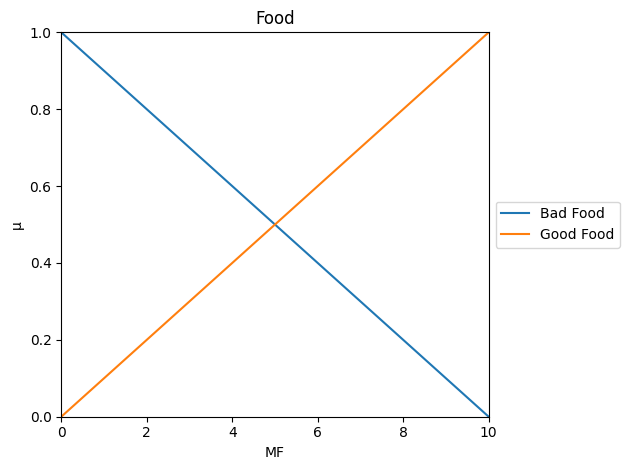

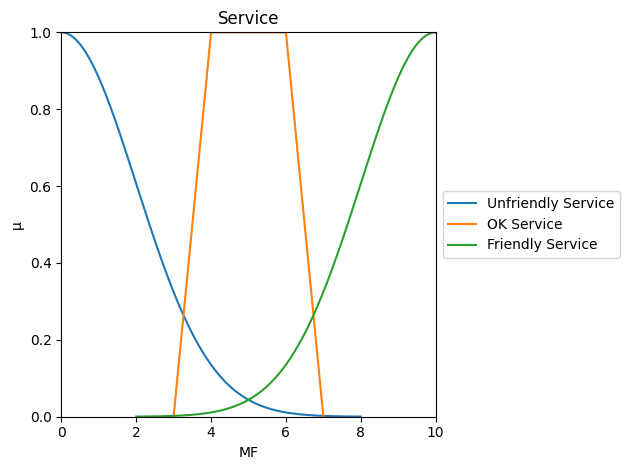

In [10]:
plot = Plot()
plotMF("Food", [badFood_mf, goodFood_mf], food.getDomain(), 1000)
plotMF("Service", [unfriendlyService_mf, okService_mf, friendlyService_mf], service.getDomain(), 1000)
plot.show()

## Rulebase

In [11]:
from juzzyPython.type1.system.T1_Rule import T1_Rule # para crear cada regla
from juzzyPython.type1.system.T1_Rulebase import T1_Rulebase # para crear la base de reglas

# Crear las reglas
rulebase = T1_Rulebase()
rulebase.addRule(T1_Rule([badFood, unfriendlyService], lowTip))
rulebase.addRule(T1_Rule([badFood, okService], lowTip))
rulebase.addRule(T1_Rule([badFood, friendlyService], mediumTip))
rulebase.addRule(T1_Rule([goodFood, okService], mediumTip))
rulebase.addRule(T1_Rule([goodFood, friendlyService], highTip))
rulebase.addRule(T1_Rule([goodFood, unfriendlyService], lowTip))

print(rulebase.toString())

Type-1 Fuzzy Logic System with 6 rules:
IF Bad Food AND Unfriendly Service THEN Low Tip 
IF Bad Food AND OK Service THEN Low Tip 
IF Bad Food AND Friendly Service THEN Medium Tip 
IF Good Food AND OK Service THEN Medium Tip 
IF Good Food AND Friendly Service THEN High Tip 
IF Good Food AND Unfriendly Service THEN Low Tip 



## Procesar Inputs / Outputs

In [12]:
food.setInput(5) # set the input 5 for food
service.setInput(8) # set the input 8 for service
# "crunch" the numbers: procesa las entradas mediante Mamdani y defuzzifica por centroide
rulebase.evaluate(1)[tip] # 1 es defuzzification por centroide

18.460450481599388

In [13]:
def getTip(foodQuality, serviceQuality):
    food.setInput(foodQuality)
    service.setInput(serviceQuality)
    print("The food was: "+str(food.getInput()))
    print("The service was: "+str(service.getInput()))
    print("Using centroid defuzzification, the FLS recommends a tip of: "
          + str(rulebase.evaluate(1)[tip])) # 1 es defuzzification por centroide

# Test the function with different values
getTip(5, 8) # should return a tip value based on the fuzzy rules defined
getTip(2, 3) # should return a tip value based on the fuzzy rules defined

The food was: 5
The service was: 8
Using centroid defuzzification, the FLS recommends a tip of: 18.460450481599388
The food was: 2
The service was: 3
Using centroid defuzzification, the FLS recommends a tip of: 5.346437768135973


# Surface view con Plotly

In [14]:
import plotly.graph_objects as go
import math
def surfaceView(useCentroid, input1Disc, input2Disc):
    incrX = food.getDomain().getSize() / (input1Disc - 1.0) # discretization level for food
    incrY = service.getDomain().getSize() / (input2Disc - 1.0) # discretization level for service
    # Crear listas para los ejes x, y, z
    x, y, z = [], [], [[0] * input1Disc for i in range(input2Disc)] # 2D array for Z values (surface)
    # Uses `x` and `y` arrays to store discretized input values.
    # `z` is a 2D array initialized to zero, which will hold the output values for the surface plot.
    for i in range(input1Disc):
        x.append(i*incrX)
    for i in range(input2Disc):
        y.append(i*incrY)

    for x_ in range(input1Disc):
        food.setInput(x[x_])
        for y_ in range(input2Disc):
            service.setInput(y[y_])
            if useCentroid:
                out = rulebase.evaluate(1)[tip] # centroid defuzzification
            else:
                out = rulebase.evaluate(0)[tip] # height defuzzification
            if out == None or math.isnan(out): # Check if the output is None or NaN
                out = 0.0 # esto puede suceder si no hay reglas definidas para esas entradas
            z[y_][x_] = out # Assign the output value to the z array
    
    fig = go.Figure(data=[go.Surface(z=z)]) # pip install --upgrade nbformat

    fig.update_layout(title='Surface View', autosize=True,
                      scene = dict(xaxis_title=food.getName(),
                                   yaxis_title=service.getName(),
                                   zaxis_title=tip.getName()),
                    width=700, height=500,
                    margin=dict(l=30, r=30, b=50, t=30))
    fig.show() # llamar a la figura para mostrar la superficie

surfaceView(True, 100, 100) # Call the function with desired discretization levels